In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
import time
from sklearn.ensemble import RandomForestRegressor


data_train = pd.read_csv("F:/contest/DF/dataset/train.csv")
data_test = pd.read_csv("F:/contest/DF/dataset/test.csv")


num = len(data_train['TERMINALNO'].unique()) + 1
num_t = len(data_test['TERMINALNO'].unique()) + 1


data = data_test.astype(np.int)
data_train = data_train.astype(np.int)


data= data.set_index(['TERMINALNO','TRIP_ID']).drop(['DIRECTION'],axis = 1)
data_train = data_train.set_index(['TERMINALNO','TRIP_ID']).drop(['DIRECTION'],axis = 1)

scaler = StandardScaler()
data_train['LONGITUDE'] = scaler.fit_transform(data_train['LONGITUDE'].reshape(-1,1))
data_train['HEIGHT'] = scaler.fit_transform(data_train['HEIGHT'].reshape(-1,1))
data_train['LATITUDE'] = scaler.fit_transform(data_train['LATITUDE'].reshape(-1,1))


data['LONGITUDE'] = scaler.fit_transform(data['LONGITUDE'].reshape(-1,1))
data['HEIGHT'] = scaler.fit_transform(data['HEIGHT'].reshape(-1,1))
data['LATITUDE'] = scaler.fit_transform(data['LATITUDE'].reshape(-1,1))

tmp1 = []
tmp2 = []
tmp3 = []
tmp4 = []


for i in data_train['TIME']:
    time_local = time.localtime(i)
    tmp1.append(time.strftime("%H",time_local))
    tmp2.append(time.strftime("%d",time_local))
    
data_train['TIME'] = tmp1
data_train['TIME_D'] = tmp2

data_train = data_train.astype(np.int)
data_train['NIGHT'] = 0
data_train['NIGHT'][(data_train['TIME'] > 22) | (data_train['TIME'] < 6)] = 1
data_train['CONTINUE'] = 0
data_tmp = data_train.sort_values(['TIME'])


for i in data['TIME']:
    time_local = time.localtime(i)
    tmp3.append(time.strftime("%H",time_local))
    tmp4.append(time.strftime("%d",time_local))

data['TIME'] = tmp3
data['TIME_D'] = tmp4

data = data.astype(np.int)
data['NIGHT'] = 0
data['NIGHT'][(data['TIME'] > 22) | (data['TIME'] < 6)] = 1
data['CONTINUE'] = 0
data = data.sort_values(['TIME'])

tmp = []
tmp_test = []

for i in range(1,num):
    
    for j in set(data_tmp.loc[i].index):
        tmp.append((pd.Series(data_tmp['TIME'].loc[i][j]).iloc[-1] - pd.Series(data_tmp['TIME'].loc[i][j]).iloc[0] + 24)%24)
    data_tmp['HEIGHT'].loc[i] = data_tmp['HEIGHT'].loc[i].mean()
    data_tmp['LONGITUDE'].loc[i] = data_tmp['LONGITUDE'].loc[i].mean()
    data_tmp['SPEED'].loc[i] = data_tmp['SPEED'].loc[i].mean()
    data_tmp['LATITUDE'].loc[i] = data_tmp['LATITUDE'].loc[i].mean()
    data_tmp['CONTINUE'].loc[i] = max(tmp)

data_train = data_tmp.sort_index()
    
df = data_train[['LONGITUDE','LATITUDE','HEIGHT','SPEED','CALLSTATE','NIGHT','CONTINUE','Y']]
for i in range(1,num):
    df['HEIGHT'].loc[i] = df['HEIGHT'].loc[i].mean()
    df['LONGITUDE'].loc[i] = df['LONGITUDE'].loc[i].mean()
    df['SPEED'].loc[i] = df['SPEED'].loc[i].mean()
    df['LATITUDE'].loc[i] = df['LATITUDE'].loc[i].mean()
    
for i in range(1,num_t):
    
    for j in set(data.loc[i].index):
        tmp_test.append((pd.Series(data['TIME'].loc[i][j]).iloc[-1] - pd.Series(data['TIME'].loc[i][j]).iloc[0] + 24)%24)
    data['HEIGHT'].loc[i] = data['HEIGHT'].loc[i].mean()
    data['LONGITUDE'].loc[i] = data['LONGITUDE'].loc[i].mean()
    data['SPEED'].loc[i] = data['SPEED'].loc[i].mean()
    data['LATITUDE'].loc[i] = data['LATITUDE'].loc[i].mean()
    data['CONTINUE'].loc[i] = max(tmp_test)
    
data = data.sort_index()

df_test = data[['LONGITUDE','LATITUDE','HEIGHT','SPEED','CALLSTATE','NIGHT','CONTINUE']]
for i in range(1,num_t):
    df_test['HEIGHT'].loc[i] = df_test['HEIGHT'].loc[i].mean()
    df_test['LONGITUDE'].loc[i] = df_test['LONGITUDE'].loc[i].mean()
    df_test['SPEED'].loc[i] = df_test['SPEED'].loc[i].mean()
    df_test['LATITUDE'].loc[i] = df_test['LATITUDE'].loc[i].mean()
    
X = pd.DataFrame([],columns = ['LONGITUDE','LATITUDE','HEIGHT','SPEED','CALLSTATE','NIGHT','CONTINUE','Y'])
X_test = pd.DataFrame([],columns = ['LONGITUDE','LATITUDE','HEIGHT','SPEED','CALLSTATE','NIGHT','CONTINUE'])

for i in range(1,num):
    X.loc[i] = df.loc[i].iloc[0]
x = X.as_matrix()[:,0:7]
y = X.as_matrix()[:,7]


for i in range(1,num_t):
    X_test.loc[i] = df_test.loc[i].iloc[0]
x_t = X_test.as_matrix()[:,0:7]


clf = RandomForestRegressor(random_state=0, n_estimators=100, n_jobs=-1)

clf.fit(x,y)

result =clf.predict(x_t)

result = pd.DataFrame({'Id': X_test.index, 'Pred': result.astype(np.int32)})
result.to_csv("F:\contest\DF\dataset/train1.csv")

F:\python\venv\anaconda\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
F:\python\venv\anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
F:\python\venv\anaconda\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
F:\python\venv\anaconda\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
F:\python\venv\anaconda\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
F:\python\venv\anaconda\lib\site-packages\ipyk

OSError: [Errno 22] Invalid argument: 'F:\\contest\\DF\\dataset\train1.csv'

In [24]:
result =clf.predict(x_t)

index = []
for i in range(len(X_test.index)):
    index.append('Id' + str(X_test.index[i]))
result = pd.DataFrame({'Id': index, 'Pred': result.astype(np.int32)})
result.to_csv("F:/contest/DF/dataset/train1.csv", index = False)

In [19]:
X_test.index[0]

1

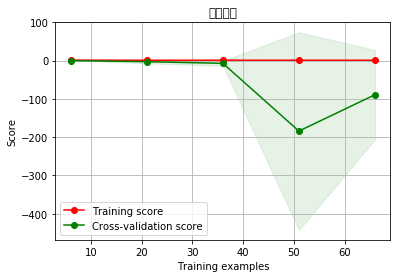

In [8]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt 

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
   
    return plt


plot_learning_curve(clf, u"学习曲线", x, y).show()

In [228]:
data_train = data_train.set_index(['TERMINALNO','TRIP_ID']).drop(['DIRECTION'],axis = 1)

for i in data_tr

In [405]:
%%time
data_train = data_train.astype(np.int)
data_train['NIGHT'] = 0
data_train['NIGHT'][(data_train['TIME'] > 22) | (data_train['TIME'] < 6)] = 1
data_train['CONTINUE'] = 0
data_tmp = data_train.sort_values(['TIME'])

tmp = []
for i in range(1,101):
    
    for j in set(data_tmp.loc[i].index):
        tmp.append((pd.Series(data_tmp['TIME'].loc[i][j]).iloc[-1] - pd.Series(data_tmp['TIME'].loc[i][j]).iloc[0] + 24)%24)
    data_tmp['HIGHT'].loc[i] = data_tmp['HIGHT'].loc[i].mean()
    data_tmp['LONGITUDE'].loc[i] = data_tmp['LONGITUDE'].loc[i].mean()
    data_tmp['SPEED'].loc[i] = data_tmp['SPEED'].loc[i].mean()
    data_tmp['LATITUDE'].loc[i] = data_tmp['LATITUDE'].loc[i].mean()
    data_tmp['CONTINUE'].loc[i] = max(tmp)
    

F:\python\venv\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
F:\python\venv\anaconda\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  del sys.path[0]
F:\python\venv\anaconda\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, va

Wall time: 43.7 s


In [410]:
data_train = data_tmp.sort_index().drop(['OVERNIGHT'], axis = 1)

In [434]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_train['LONGITUDE'] = scaler.fit_transform(data_train['LONGITUDE'].reshape(-1,1))
data_train['HEIGHT'] = scaler.fit_transform(data_train['HEIGHT'].reshape(-1,1))
data_train['LATITUDE'] = scaler.fit_transform(data_train['LATITUDE'].reshape(-1,1))

F:\python\venv\anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.
F:\python\venv\anaconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """
F:\python\venv\anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
F:\python\venv\anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [14]:
str(1)

'1'

In [443]:
df = data_train[['LONGITUDE','LATITUDE','HEIGHT','SPEED','CALLSTATE','NIGHT','CONTINUE','Y']]
for i in range(1,101):
    df['HEIGHT'].loc[i] = df['HEIGHT'].loc[i].mean()
    df['LONGITUDE'].loc[i] = df['LONGITUDE'].loc[i].mean()
    df['SPEED'].loc[i] = df['SPEED'].loc[i].mean()
    df['LATITUDE'].loc[i] = df['LATITUDE'].loc[i].mean()

F:\python\venv\anaconda\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
F:\python\venv\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
F:\python\venv\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd f

In [502]:
%%time

X = pd.DataFrame([],columns = [''])
for i in range(1,101):
    X.loc[i] = df.loc[i].iloc[0]
    

ValueError: cannot set a frame with no defined columns

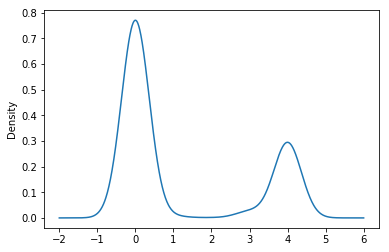

In [457]:
import matplotlib.pyplot as plt

fig = plt.figure()



In [524]:
%%time

    
X = pd.DataFrame([],columns = ['LONGITUDE','LATITUDE','HEIGHT','SPEED','CALLSTATE','NIGHT','CONTINUE','Y'])
for i in range(1,101):
    X.loc[i] = df.loc[i].iloc[0]



Wall time: 330 ms


In [522]:
x